1. Data Collection

Load dataset

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("medquad.csv")

# Display the first 5 rows of the dataset
df.head()


,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma


2.Exploratory Data Analysis (EDA)

Overview of Dataset Structure

In [ ]:
print("📌 Columns:", list(df.columns))
print("📊 Number of rows:", len(df))

# Check for missing values
print("\n❗ Missing values per column:\n", df.isnull().sum())

# Sample questions
print("\n🔀 Sample questions:\n", df['question'].sample(5, random_state=42).to_string(index=False))


📌 Columns: ['question', 'answer', 'source', 'focus_area']
📊 Number of rows: 16412

❗ Missing values per column:
 question       0
answer         5
source         0
focus_area    14
dtype: int64

🔀 Sample questions:
 What are the genetic changes related to leukoen...
        What to do for Primary Biliary Cirrhosis ?
          Who is at risk for Fecal Incontinence? ?
 What is (are) Pervasive Developmental Disorders ?
         What are the symptoms of Crome syndrome ?


random questions, and answer length distribution.

In [ ]:
print(df['question'].sample(5))


8488             What are the treatments for Hemophilia ?
7175    What are the symptoms of Charcot-Marie-Tooth d...
1377                   What is (are) Male Breast Cancer ?
1066              How to diagnose AIDS-Related Lymphoma ?
3669    What are the symptoms of Yorifuji Okuno syndro...
Name: question, dtype: object


Check for Missing Values (NaN)

In [ ]:
# 1. Count missing values (NaN) in each column
print("Missing values (NaN) per column:")
print(df.isnull().sum())

Missing values (NaN) per column:
question       0
answer         5
source         0
focus_area    14
dtype: int64


Extract QA Pairs

In [ ]:
qa_df = df[['question', 'answer']]
qa_df.head()


,question,answer
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea..."
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ..."
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...


Select Relevant Columns and Drop Incomplete Rows


In [ ]:
# Keep only the essential columns for QA tasks and remove rows with missing questions or answers.
df = df[['question','answer','source','focus_area']].dropna(subset=['question','answer']).reset_index(drop=True)
print(df.shape)
df.head(3)

(16407, 4)


,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma


Answer Length Distribution

In [ ]:
# Add columns for text length
df['q_len'] = df['question'].str.len()
df['a_len'] = df['answer'].str.len()

# Stats on answer length
print("\n📏 Answer length (characters):\n", df['a_len'].describe())



📏 Answer length (characters):
 count    16407.000000
mean      1303.452673
std       1656.694326
min          6.000000
25%        487.000000
50%        890.000000
75%       1589.000000
max      29046.000000
Name: a_len, dtype: float64


Plot: Histogram of Answer Lengths

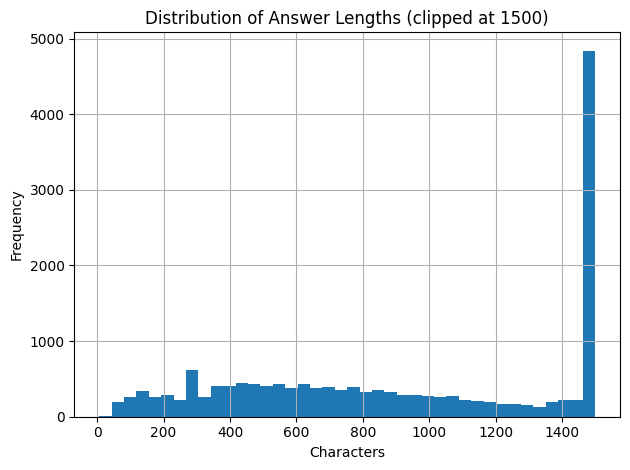

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
df['a_len'].clip(0, 1500).hist(bins=40)
plt.title("Distribution of Answer Lengths (clipped at 1500)")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


Plot: Top 20 Focus Areas

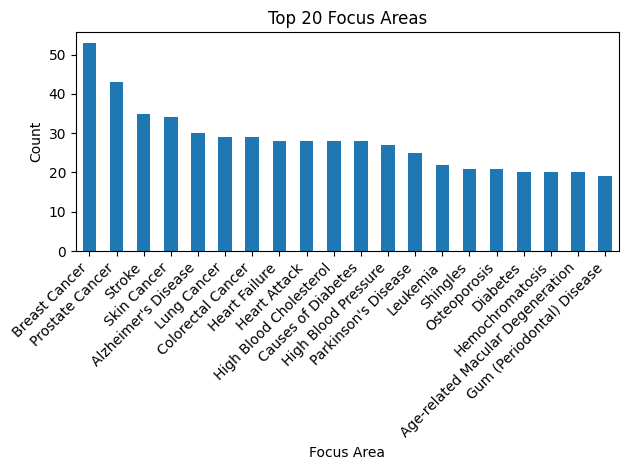

In [ ]:
if 'focus_area' in df.columns:
    top_focus = df['focus_area'].value_counts().head(20)

    plt.figure()
    top_focus.plot(kind='bar')
    plt.title("Top 20 Focus Areas")
    plt.xlabel("Focus Area")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Text Cleaning & Preparation

Basic Text Cleaning

In [ ]:
import re

def clean_text(s: str) -> str:
    s = str(s).strip()
    s = re.sub(r'\s+', ' ', s)  # replace multiple spaces/tabs/newlines with a single space
    return s

# Apply cleaning function
df['question'] = df['question'].apply(clean_text)
df['answer']   = df['answer'].apply(clean_text)


Drop Empty Questions/Answers

In [ ]:
# Remove rows with missing or now-empty fields
df = df.dropna(subset=['question', 'answer'])


Final Dataset Preview

In [ ]:
print("✅ Dataset shape after cleaning:", df.shape)
df.head(3)

✅ Dataset shape after cleaning: (16407, 6)


,question,answer,source,focus_area,q_len,a_len
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma,24,1850
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma,22,1209
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in o...,NIHSeniorHealth,Glaucoma,35,1607
